In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

- Comment lire plusieurs à la fois dans un répertoire
- On peut utiliser la fonction glob du module glob
- Il faut fournir à cette fonction le chemin de chaque fichier
- De préférence, il faut que les fichiers disposent des noms ayant la même structure

In [19]:
glob?

Signature: glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      ~/anaconda3/lib/python3.6/glob.py
Type:      function


In [2]:
# Return a list of paths matching a pathname pattern.
# glob
from glob import glob
nomsfichiers = glob(r"C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\*.csv")

In [3]:
# On peut appliquer une boucle for sur nomsfichiers
for nom in nomsfichiers:
    print(nom)

C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\BH - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\BIAT - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\BNA - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\BS - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\BT - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\CC - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\DH - Données Historiques.csv
C:\Users\inesa\OneDrive\Bureau\Cours\Semestre 2\Analyse des Données financiéres\clustering_fintech\IC

In [11]:
# Chargement des données à partir des fichiers présentant dans le répertoire
# Attention le fichier utilise une convention française la virgue , au lieu de point chez les anglais
# Cela nous pose un vrai problème (les colonnes des prix sont interprétées comme des chaînes de caractères (string str object)
dfs = [pd.read_csv(f, thousands=',') for f in nomsfichiers]

In [7]:
print( type(dfs) )

<class 'list'>


In [8]:
print( len(dfs) )

18


In [9]:
# Exemple : on travaille avec l'entreprise Polina
df = dfs[0]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
Date           286 non-null object
Dernier        286 non-null int64
Ouv.           286 non-null int64
Plus Haut      286 non-null int64
Plus Bas       286 non-null int64
Vol.           286 non-null object
Variation %    286 non-null object
dtypes: int64(4), object(3)
memory usage: 15.8+ KB


In [27]:
df.columns

Index(['Date', 'Dernier', 'Ouv.', 'Plus Haut', 'Plus Bas', 'Vol.',
       'Variation %'],
      dtype='object')

In [28]:
df["Date"]

0      06/04/2020
1      03/04/2020
2      02/04/2020
3      01/04/2020
4      31/03/2020
          ...    
281    08/01/2019
282    07/01/2019
283    04/01/2019
284    03/01/2019
285    02/01/2019
Name: Date, Length: 286, dtype: object

In [29]:
type(pd.to_datetime(df["Date"], infer_datetime_format=True).values[0] )

numpy.datetime64

In [30]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)

In [31]:
df = df.set_index("Date")

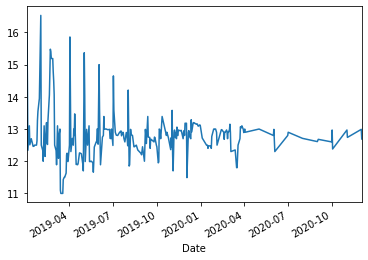

In [32]:
(df["Dernier"]/100).plot();

### Deuxième méthode pour régler le problème de la virgule

In [33]:
banque_habitat = pd.read_csv("BH - Données Historiques.csv")

In [34]:
banque_habitat.plot();

TypeError: no numeric data to plot

In [35]:
banque_habitat["Dernier"] = banque_habitat["Dernier"].str.replace(',', ".").astype(float)

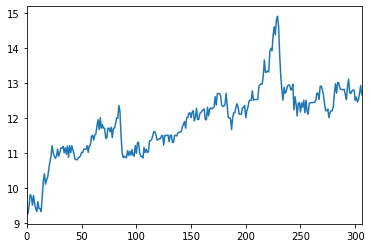

In [36]:
banque_habitat["Dernier"].plot();

## On reprend l'exemple depuis le début

In [12]:
dfs = [pd.read_csv(f) for f in nomsfichiers]

In [13]:
# On écrit une boucle for pour boucler sur toutes les entreprises


new_list_data_frames = []
for entreprise in dfs:
    
    entreprise["Dernier"] = entreprise["Dernier"].str.replace(',', ".").astype(float)
    entreprise["Date"] = pd.to_datetime(entreprise["Date"], infer_datetime_format=True)
    entreprise = entreprise.set_index("Date")
    
    new_list_data_frames.append(entreprise)
    

In [14]:
len(new_list_data_frames)

18

In [40]:
# Construction d'un dataframes

listes_prix_fermetures = []
for entreprise in new_list_data_frames:
    close = entreprise["Dernier"].values
    listes_prix_fermetures.append(close)

In [41]:
dataframe = pd.DataFrame(data = listes_prix_fermetures).T
dataframe.shape

(315, 18)

In [42]:
new_list_data_frames[0].index.shape

(286,)

In [43]:
nldf = new_list_data_frames
data = pd.concat([nldf[0]["Dernier"], 
                     nldf[1]["Dernier"],
                    nldf[2]["Dernier"],
                    nldf[3]["Dernier"],
                    nldf[4]["Dernier"],
                    nldf[5]["Dernier"],
                    nldf[6]["Dernier"],
                    nldf[7]["Dernier"],
                    nldf[8]["Dernier"],
                    nldf[9]["Dernier"],
                    nldf[10]["Dernier"],
                    nldf[11]["Dernier"],
                    nldf[12]["Dernier"],
                    nldf[13]["Dernier"],
                    nldf[14]["Dernier"],
                    nldf[15]["Dernier"],
                     nldf[16]["Dernier"],
                     nldf[17]["Dernier"]
                    ], join='outer', axis=1)

In [44]:
type(data)

pandas.core.frame.DataFrame

In [45]:
data.columns

Index(['Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier',
       'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier', 'Dernier'],
      dtype='object')

In [3]:
data

NameError: name 'data' is not defined

## Il reste un problème lié aux noms de ces entreprises

In [47]:
nom

'/home/ahmed/Desktop/clustering_fintech/BT - Données Historiques.csv'

In [48]:
nomsfichiers = glob("/home/ahmed/Desktop/clustering_fintech/* - Données Historiques.csv")

In [49]:
nomsfichiers

['/home/ahmed/Desktop/clustering_fintech/POULA - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/TLNET - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/STVR - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/BIAT - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/OTH - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/BNA - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/SAH - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/BH - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/ICF - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/STPAP - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/UIB - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/BS - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/SMG - Données Historiques.csv',
 '/home/ahmed/Desktop/clustering_fintech/DH -

In [50]:
x = nomsfichiers[0].replace("/home/ahmed/Desktop/clustering_fintech/","")
x.replace(" - Données Historiques.csv","")

'POULA'

In [51]:
noms_entreprises = []
for i in range(len(nomsfichiers)):
    x = nomsfichiers[i].replace("/home/ahmed/Desktop/clustering_fintech/","")
    x = x.replace(" - Données Historiques.csv","")
    noms_entreprises.append(x)
    

In [52]:
noms_entreprises

['POULA',
 'TLNET',
 'STVR',
 'BIAT',
 'OTH',
 'BNA',
 'SAH',
 'BH',
 'ICF',
 'STPAP',
 'UIB',
 'BS',
 'SMG',
 'DH',
 'SFBT',
 'STAR',
 'CC',
 'BT']

In [2]:
data.columns = noms_entreprises

NameError: name 'noms_entreprises' is not defined

In [1]:
type(data)

NameError: name 'data' is not defined

In [55]:
data.isna().sum()

POULA     29
TLNET      0
STVR       1
BIAT       0
OTH        1
BNA        5
SAH        1
BH         8
ICF        1
STPAP      1
UIB        3
BS         2
SMG      168
DH        16
SFBT       0
STAR     129
CC        22
BT         2
dtype: int64

In [56]:
entreprises_donnee_manquantes = data.columns[ data.isna().sum() != 0 ]

In [57]:
for entreprise in entreprises_donnee_manquantes:
    print(entreprise)

POULA
STVR
OTH
BNA
SAH
BH
ICF
STPAP
UIB
BS
SMG
DH
STAR
CC
BT


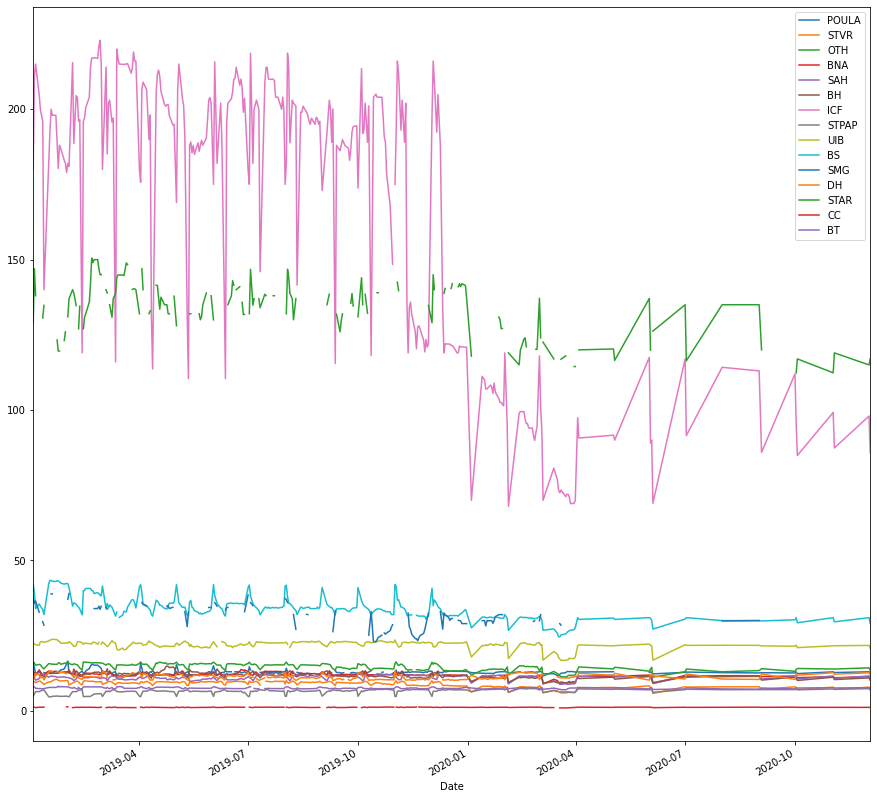

In [58]:
for entreprise in entreprises_donnee_manquantes:
    data.loc[:,entreprise].plot(figsize=(15,15),legend=True);

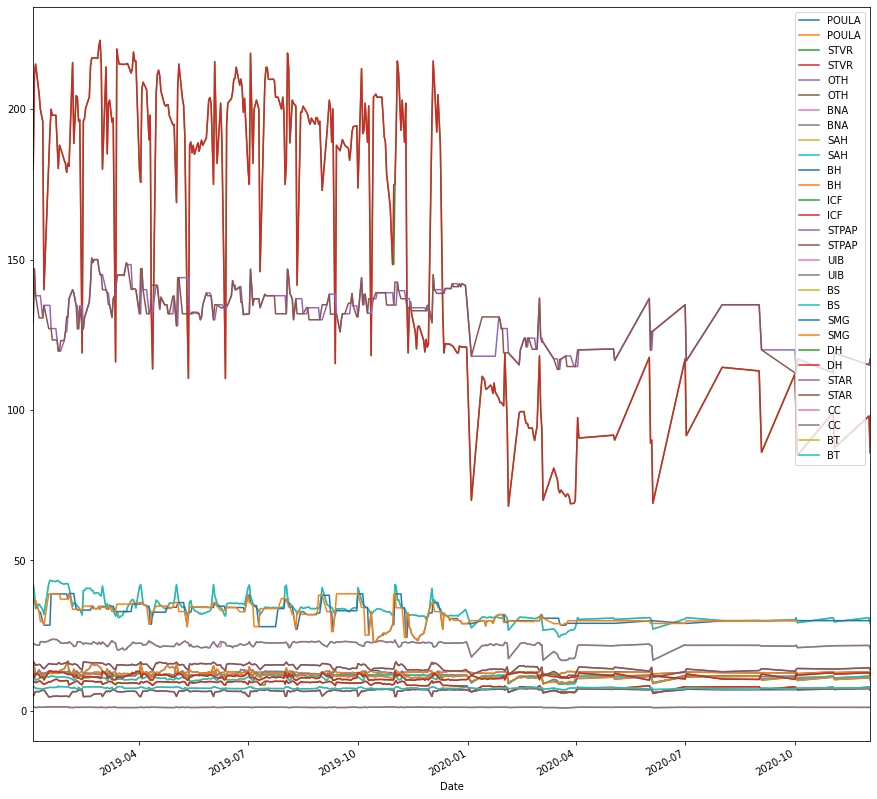

In [59]:
for entreprise in entreprises_donnee_manquantes:
    data.fillna(method = "ffill").loc[:,entreprise].plot(figsize=(15,15),legend=True);
    data.fillna(method = "bfill").loc[:,entreprise].plot(figsize=(15,15),legend=True);

In [60]:
# On remplit les valeurs vides par les valeurs suivantes
data = data.fillna(method = "ffill")
# On remplit les valeurs vides par les valeurs précédentes
data = data.fillna(method = "bfill")

In [61]:
# Vérification que le dataframe ne contient plus de données manquantes
data.isna().sum().sum()

0

In [62]:
rendement = data.pct_change().mean() * 252

In [63]:
rendement = pd.DataFrame(rendement)

In [64]:
rendement

,0
POULA,0.110837
TLNET,0.471179
STVR,0.190841
BIAT,0.061855
OTH,0.136665
BNA,0.211262
SAH,0.313364
BH,0.100374
ICF,2.695973
STPAP,1.344208


In [65]:
rendement.columns = ["rendement"]

In [66]:
rendement

,rendement
POULA,0.110837
TLNET,0.471179
STVR,0.190841
BIAT,0.061855
OTH,0.136665
BNA,0.211262
SAH,0.313364
BH,0.100374
ICF,2.695973
STPAP,1.344208


In [67]:
volatilite = data.pct_change().std() * np.sqrt(252)

In [68]:
rendement["volatilite"] = volatilite

In [69]:
rendement

,rendement,volatilite
POULA,0.110837,0.776421
TLNET,0.471179,1.175390
STVR,0.190841,0.990550
BIAT,0.061855,0.476856
OTH,0.136665,0.762548
BNA,0.211262,0.835500
SAH,0.313364,0.856388
BH,0.100374,0.773406
ICF,2.695973,2.750082
STPAP,1.344208,1.450645


In [70]:
X = np.asarray([np.asarray(rendement['rendement']),np.asarray(rendement['volatilite'])]).T

In [71]:
from sklearn.cluster import KMeans

In [72]:

inertie = []
for k in range(2,19):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    inertie.append(k_means.inertia_)

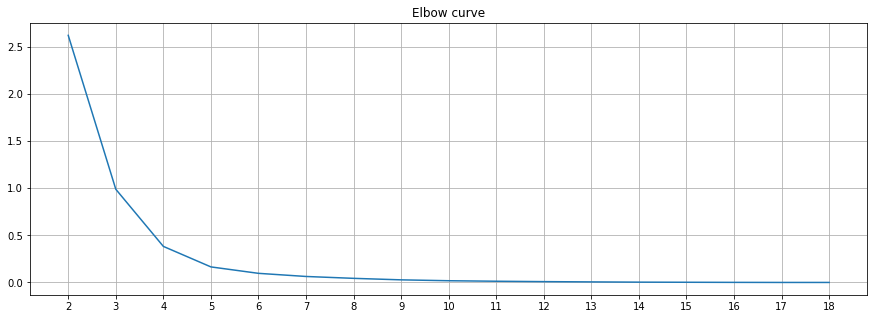

In [73]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 19), inertie)
plt.xticks(range(2,19))
plt.grid(True)
plt.title('Elbow curve');

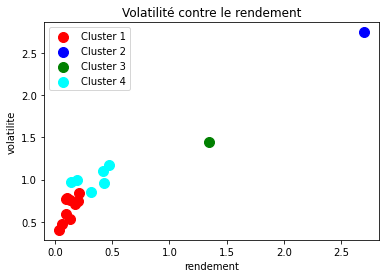

In [74]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('volatilite')
plt.xlabel('rendement')
plt.title("Volatilité contre le rendement")
plt.legend()
plt.show()


In [75]:
txt = rendement.index

In [76]:
txt

Index(['POULA', 'TLNET', 'STVR', 'BIAT', 'OTH', 'BNA', 'SAH', 'BH', 'ICF',
       'STPAP', 'UIB', 'BS', 'SMG', 'DH', 'SFBT', 'STAR', 'CC', 'BT'],
      dtype='object')

In [77]:
%matplotlib qt

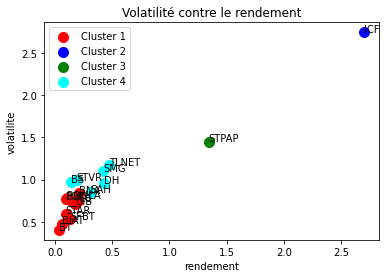

In [78]:
txt = rendement.index
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

n = X.shape[0]
for i, word in zip(range(X.shape[0]), txt) :
    plt.annotate(word, (X[i, 0], X[i, 1]))
    
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('volatilite')
plt.xlabel('rendement')
plt.title("Volatilité contre le rendement")
plt.legend()
plt.show()